In [0]:
import pandas as pd
from google.colab import files 
import numpy as np

In [2]:
uploaded_insecurity = files.upload()

Saving datainsecurity.csv to datainsecurity.csv


In [3]:
for fn1 in uploaded_insecurity.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn1, length=len(uploaded_insecurity[fn1])))

User uploaded file "datainsecurity.csv" with length 5003605 bytes


In [0]:
import io 
insecurity_df = pd.read_csv(io.StringIO(uploaded_insecurity['datainsecurity.csv'].decode('cp1252')),index_col=0)
insecurity_df=insecurity_df.groupby(['State'],sort=False).median()
insecurity_df=insecurity_df.drop(['DC'])

In [5]:
insecurity_df.head(10)

,FIPS,FOODINSEC_10_12,FOODINSEC_13_15,CH_FOODINSEC_12_15,VLFOODSEC_10_12,VLFOODSEC_13_15,CH_VLFOODSEC_12_15,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11,PCT_DIABETES_ADULTS08,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
State,,,,,,,,,,,,,,,,,,,,,
AL,1065.0,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,9.3,12.90,...,1597.500000,10589.909091,7.272727,8.857143,11.666667,21.750000,328.750000,1195.000000,1780.000000,5170.875000
AK,2164.0,12.1,13.3,1.2,4.4,4.4,0.0,7.4,8.0,6.30,...,573.333333,4817.333333,2.000000,1.200000,0.000000,0.000000,132.500000,596.000000,540.000000,1231.571429
AZ,4013.0,19.7,19.2,-0.5,8.1,7.4,-0.7,9.7,10.9,8.40,...,2059.047619,17244.800000,17.500000,22.450000,26.500000,67.176471,562.857143,2309.809524,2132.857143,5534.904762
AR,5074.0,14.9,14.9,0.0,6.4,6.0,-0.4,11.2,11.5,11.25,...,859.000000,5190.285714,0.000000,0.000000,5.166667,9.013889,198.000000,731.466667,989.326923,2800.402778
CA,6058.0,15.6,12.6,-3.0,5.7,4.5,-1.2,10.4,10.8,7.60,...,4080.357143,41065.384967,55.339367,77.642745,70.491667,256.336508,1219.579832,5559.573016,4140.640394,11748.105042
CO,8063.0,14.1,12.1,-2.0,5.8,5.1,-0.7,8.0,8.8,5.60,...,982.500000,9308.666667,0.000000,0.000000,10.000000,34.500000,306.000000,1400.714286,1040.000000,2628.500000
CT,9008.0,13.4,13.1,-0.3,4.9,6.3,1.4,6.8,8.0,7.65,...,3350.076923,46786.690705,127.676282,197.041667,115.641026,267.861111,791.153846,3821.618590,3210.217949,8997.389744
DE,10003.0,12.0,13.2,1.2,4.5,4.8,0.3,6.3,7.0,11.20,...,3747.000000,40099.950000,62.500000,114.650000,92.500000,230.300000,1047.000000,4665.000000,3958.888889,10472.222222
FL,12070.0,14.8,12.7,-2.1,5.7,5.4,-0.3,9.3,9.4,10.35,...,4375.454545,41834.431818,45.829493,75.908986,73.352535,199.451299,1043.068182,4520.209091,4839.015152,14751.766234


In [0]:
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.patches as mpatches

In [0]:
x=insecurity_df.A02650
y=insecurity_df.PCT_DIABETES_ADULTS13
z=insecurity_df.FOODINSEC_13_15
s=insecurity_df.PCT_OBESE_ADULTS13

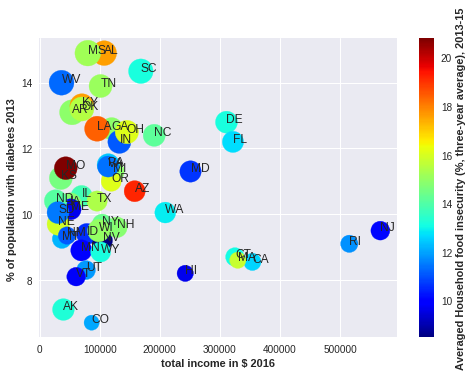

In [8]:
fig, ax = plt.subplots()
im=ax.scatter(x,y,c=z,s=(insecurity_df.PCT_OBESE_ADULTS13)**1.8,cmap=plt.cm.jet)
plt.xlabel('total income in $ 2016', fontweight='bold')
plt.ylabel('% of population with diabetes 2013 ', fontweight='bold')

cbar=fig.colorbar(im, ax=ax)
cbar.set_label('Averaged Household food insecurity (%, three-year average), 2013-15', fontweight='bold')
for i, txt in enumerate(insecurity_df.index.values):
    ax.annotate(txt, (x[i], y[i]))

In [9]:
from scipy.stats import linregress
print(linregress(insecurity_df.A02650.values, insecurity_df.FOODINSEC_13_15.values))
print(linregress(insecurity_df.PCT_OBESE_ADULTS13.values, insecurity_df.FOODINSEC_13_15.values))
print(linregress(insecurity_df.PCT_DIABETES_ADULTS13.values, insecurity_df.FOODINSEC_13_15.values))

LinregressResult(slope=-4.238232178250307e-06, intercept=14.166398560783039, rvalue=-0.1932494929469461, pvalue=0.17874383716427936, stderr=3.1058538493090755e-06)
LinregressResult(slope=0.30586518787426176, intercept=4.426231466171851, rvalue=0.44678609335870656, pvalue=0.0011436209192777968, stderr=0.08840126753870031)
LinregressResult(slope=0.5471965183588962, intercept=7.706203785862174, rvalue=0.417885943374823, pvalue=0.0025306112660798095, stderr=0.17170764653596582)


In [10]:
print(linregress(insecurity_df.A02650.values, insecurity_df.FOODINSEC_CHILD_03_11.values))
print(linregress(insecurity_df.PCT_OBESE_ADULTS13.values, insecurity_df.FOODINSEC_CHILD_03_11.values))
print(linregress(insecurity_df.PCT_DIABETES_ADULTS13.values, insecurity_df.FOODINSEC_CHILD_03_11.values))

LinregressResult(slope=-1.1524253121138905e-06, intercept=9.068904860678805, rvalue=-0.08384501694177439, pvalue=0.5626571909262851, stderr=1.976892163399831e-06)
LinregressResult(slope=0.03766229516581278, intercept=7.782616856506559, rvalue=0.08778235516921225, pvalue=0.5443903488727766, stderr=0.06168778472421872)
LinregressResult(slope=0.22681270082715127, intercept=6.474485218518048, rvalue=0.27638384670666366, pvalue=0.052024644857421906, stderr=0.1138358017251869)


In [0]:
x=insecurity_df.A02650
y=insecurity_df.PCT_DIABETES_ADULTS13
z=insecurity_df.FOODINSEC_CHILD_03_11
s=insecurity_df.PCT_OBESE_ADULTS13

In [0]:
fig, ax = plt.subplots()
im=ax.scatter(x,y,c=z,s=(insecurity_df.PCT_OBESE_ADULTS13)**1.8,cmap=plt.cm.jet)
plt.xlabel('total income in $ 2016', fontweight='bold')
plt.ylabel('% of population with diabetes 2013 ', fontweight='bold')

cbar=fig.colorbar(im, ax=ax)
cbar.set_label('averaged Child food insecurity 2003-11', fontweight='bold')
for i, txt in enumerate(insecurity_df.index.values):
    ax.annotate(txt, (x[i], y[i]))

In [0]:
subset_data=insecurity_df.ix[['MS','AR','AL','SC','KY','LA','CT','NJ','MD','AK','MA','RI']]
#subset_data=state_social_df
subset_data

In [0]:
height =subset_data.FOODINSEC_13_15.values
bars = ('MS','AR','AL','SC','KY','LA','CT','NJ','MD','AK','MA','RI')
y_pos = np.arange(len(bars))

barlist=plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
#plt.xticks(y_pos, bars, color=(0.4,0.4,0.4,0.4,0.4,0.4,0.6,0.6,0.6,0.6,0.6,0.6))
plt.xlabel("States")
plt.ylabel("Household food insecurity (%, three-year average), 2013-15*")
for iter in range(12):
  if iter < 6:
    barlist[iter].set_color('r')
  else:
    barlist[iter].set_color('b')